# Microbiology Events Code

##### This Python Notebook is dedicated to - "microbiology_events_codes_3.csv" Dataset.

-----------------------------------------

## Event Flow for the Notebook

#### 0. Library Imports
- Import all required Python libraries such as pandas, numpy, matplotlib, seaborn, etc.

#### 1. Data Collection Phase (Data Import)
- Load `microbiology_events_codes_3.csv`
- Display first few rows  
- Keep a copy of the original dataset  

#### 1.1 Initial Data Exploration
- Check column names  
- View datatypes  
- Display dataframe info  
- Check dataset size (rows & columns)  
- Inspect unique values of each column  

#### 2. Null Values & Missing Data Analysis
- Count missing values per column  
- Calculate missing value percentages  
- Visualize missingness patterns  

#### 3. Descriptive Statistics
- Numerical summary (mean, median, etc.)  
- Value counts for categorical columns  
- Distribution plots (histograms)

#### 4. Dilution Value Analysis (Outliers)
- Check distribution of `dilution_value`  
- Identify outliers  
- Visualize with subplots  
- Decide whether to remove extremely high dilution values  

#### 5. String-column Cleaning & Validation
- Identify all string columns  
- Preview whitespace and casing inconsistencies  
- Detect leading/trailing spaces  
- Verify case normalization  
- Validate `dilution_comparison` symbols  
- Validate microbiology interpretation labels  



------------------------------------

#### 0. Library Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

#### 1. Data Collection Phase (Data import)

In [2]:
df = pd.read_csv('microbiology_events_codes_3.csv')

In [3]:
# Checking the first 3 rows of the dataframe.
# This confirms that the data has been loaded correctly. 
df.head(3)

,subject_id,hadm_id,chartdate,charttime,spec_type_desc,test_name,org_name,ab_name,dilution_text,dilution_comparison,dilution_value,interpretation,technician_id,qc_flag
0,10000980,26913865.0,2189-06-27 00:00:00,2189-06-27 10:52:00,MRSA SCREEN,MRSA SCREEN,NaN,NaN,NaN,NaN,NaN,NaN,TECH_063,QC_OK
1,10002155,23822395.0,2129-08-04 00:00:00,2129-08-04 17:04:00,MRSA SCREEN,MRSA SCREEN,NaN,NaN,NaN,NaN,NaN,NaN,TECH_095,QC_OK
2,10002155,23822395.0,2129-08-05 00:00:00,2129-08-05 15:54:00,URINE,Legionella Urinary Antigen,NaN,NaN,NaN,NaN,NaN,NaN,TECH_083,QC_OK


In [4]:
# Keeping a copy of the original dataset for reference
original_dataset = df.copy()

##### 1.1 Initial Data Exploration

In [5]:
# Checking the column names of the dataframe
df.columns

Index(['subject_id', 'hadm_id', 'chartdate', 'charttime', 'spec_type_desc',
       'test_name', 'org_name', 'ab_name', 'dilution_text',
       'dilution_comparison', 'dilution_value', 'interpretation',
       'technician_id', 'qc_flag'],
      dtype='object')

In [6]:
df.dtypes

subject_id               int64
hadm_id                float64
chartdate               object
charttime               object
spec_type_desc          object
test_name               object
org_name                object
ab_name                 object
dilution_text           object
dilution_comparison     object
dilution_value         float64
interpretation          object
technician_id           object
qc_flag                 object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15587 entries, 0 to 15586
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   subject_id           15587 non-null  int64  
 1   hadm_id              15587 non-null  float64
 2   chartdate            15587 non-null  object 
 3   charttime            15587 non-null  object 
 4   spec_type_desc       15587 non-null  object 
 5   test_name            15587 non-null  object 
 6   org_name             5391 non-null   object 
 7   ab_name              4820 non-null   object 
 8   dilution_text        4713 non-null   object 
 9   dilution_comparison  4711 non-null   object 
 10  dilution_value       4711 non-null   float64
 11  interpretation       4820 non-null   object 
 12  technician_id        15587 non-null  object 
 13  qc_flag              15587 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 1.7+ MB


##### ↑ We notice that total rows were: 15587, out of which some columns have nulls.

##### Now, checking the Data Distribution and overall look of the dataset

In [8]:
df.describe(include='all')

,subject_id,hadm_id,chartdate,charttime,spec_type_desc,test_name,org_name,ab_name,dilution_text,dilution_comparison,dilution_value,interpretation,technician_id,qc_flag
count,1.558700e+04,1.558700e+04,15587,15587,15587,15587,5391,4820,4713,4711,4711.000000,4820,15587,15587
unique,NaN,NaN,4648,7709,42,90,82,27,32,3,NaN,3,120,3
top,NaN,NaN,2185-01-09 00:00:00,2185-01-09 10:55:00,URINE,URINE CULTURE,ESCHERICHIA COLI,GENTAMICIN,<=1,<=,NaN,S,TECH_037,QC_OK
freq,NaN,NaN,48,34,4951,4795,1508,453,1454,3233,NaN,3807,172,13236
mean,1.522098e+07,2.503469e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.062420,NaN,NaN,NaN
std,2.910238e+06,2.846364e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.245298,NaN,NaN,NaN
min,1.000098e+07,2.000790e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.060000,NaN,NaN,NaN
25%,1.266277e+07,2.266346e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,NaN,NaN,NaN
50%,1.519823e+07,2.514649e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
75%,1.772189e+07,2.743116e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN


#### Checking how each column looks specifically (their unique values vs its count)

In [9]:
for i in df.columns:
    print(df[i].value_counts())

subject_id
12492737    122
13135946    107
11204646     89
15016682     83
16571922     73
           ... 
15697529      1
15692859      1
15686320      1
15681388      1
19997669      1
Name: count, Length: 2616, dtype: int64
hadm_id
27261448.0    124
22133572.0    107
29675270.0     86
25177313.0     84
21332395.0     66
             ... 
26541852.0      1
20021932.0      1
29836403.0      1
23742800.0      1
28574336.0      1
Name: count, Length: 2454, dtype: int64
chartdate
2185-01-09 00:00:00    48
2118-10-30 00:00:00    47
2199-10-16 00:00:00    40
2154-08-05 00:00:00    39
2163-04-25 00:00:00    37
                       ..
2149-11-21 00:00:00     1
2149-12-15 00:00:00     1
2173-07-30 00:00:00     1
2191-04-19 00:00:00     1
2173-12-18 00:00:00     1
Name: count, Length: 4648, dtype: int64
charttime
2185-01-09 10:55:00    34
2123-09-03 03:30:00    32
2184-08-10 14:43:00    30
2182-07-09 05:52:00    29
2155-08-21 23:41:00    29
                       ..
2144-03-22 19:25:00     1

#### 3. DATA CLEANING

<p style="font-size:18px">
<b>Checking for Duplicated Data points (rows)</b>
</p>

In [10]:
# Identify duplicate rows
duplicate_rows = df[df.duplicated()]
if not duplicate_rows.empty:
    print(f"Number of duplicate rows found: {len(duplicate_rows)}")
    print("\nDuplicate rows to be removed:\n")
    display(duplicate_rows)
else:
    print("No duplicate rows found.")

# Remove duplicates
df.drop_duplicates(inplace=True)

# Reset index after dropping duplicates
df.reset_index(drop=True)

print(f"Initial data shape before removing duplicates: {original_dataset.shape}")
print(f"Data shape after removing duplicates: {df.shape}")

Number of duplicate rows found: 1

Duplicate rows to be removed:



,subject_id,hadm_id,chartdate,charttime,spec_type_desc,test_name,org_name,ab_name,dilution_text,dilution_comparison,dilution_value,interpretation,technician_id,qc_flag
2455,11823798,23491105.0,2186-07-16 00:00:00,2186-07-16 00:25:00,BLOOD CULTURE,"Blood Culture, Routine",NaN,NaN,NaN,NaN,NaN,NaN,TECH_120,QC_OK


Initial data shape before removing duplicates: (15587, 14)
Data shape after removing duplicates: (15586, 14)


<p style="font-size:18px">
<b>Dropping Columns that are not required.</b><br>
<list><ul>1. Dropped `chartdate` because `charttime` contains both date & time.</ul>
<ul>2. Dropped `dilution_text` because the same information can be derived from `dilution_value` + `dilution_comparison`.  </ul>
</list>
</p>

In [11]:
# 1) Drop columns
cols_to_drop = ['chartdate', 'dilution_text']
df = df.drop(columns=[c for c in cols_to_drop if c in df.columns])

<p style="font-size:18px">
<b>Data type normalization (conversions)</b><br>
<list>
<ul>3. Converted `charttime` → `datetime`. Converted `hadm_id` → integer type. Converted textual/categorical columns to pandas <code>string</code> dtype for consistent handling of missing values and string operations.</ul></list>
</p>

In [12]:
# 2) Parse charttime to datetime
# Use errors='coerce' so any malformed entries become <NA> and you can inspect them.
df['charttime'] = pd.to_datetime(df['charttime'], errors='coerce')

In [13]:
# checking if there was any issue in conversion
mask_bad = df['charttime'].isna() & original_dataset['charttime'].notna()
bad_rows = original_dataset[mask_bad]
bad_rows

,subject_id,hadm_id,chartdate,charttime,spec_type_desc,test_name,org_name,ab_name,dilution_text,dilution_comparison,dilution_value,interpretation,technician_id,qc_flag


###### As we see, there are no issues in conversion, we get an empty response

In [14]:
# 3) Convert hadm_id -> integer (nullable Int64 to preserve NA if any)
# We first coerce to numeric to be safe, then convert to pandas nullable integer dtype
df['hadm_id'] = pd.to_numeric(df['hadm_id'], errors='coerce').astype('Int64')
df['hadm_id'].info() # checking if any nulls were introduced

<class 'pandas.core.series.Series'>
Index: 15586 entries, 0 to 15586
Series name: hadm_id
Non-Null Count  Dtype
--------------  -----
15586 non-null  Int64
dtypes: Int64(1)
memory usage: 774.8 KB


In [15]:
# 4) Convert selected textual/categorical columns to pandas string dtype
cols_string = [
    'spec_type_desc', 'test_name', 'org_name', 'ab_name',
    'dilution_comparison', 'interpretation',
    'technician_id', 'qc_flag'
]
# keep only columns that actually exist in the DataFrame
cols_string = [c for c in cols_string if c in df.columns]

# Cast them to pandas StringDtype which keeps <NA> instead of 'nan'
df[cols_string] = df[cols_string].astype('string')

In [16]:
# 5) Quick validation printouts (for the notebook)
print("AFTER changes:")
display(df.head(3))
print()
df.info()

AFTER changes:


,subject_id,hadm_id,charttime,spec_type_desc,test_name,org_name,ab_name,dilution_comparison,dilution_value,interpretation,technician_id,qc_flag
0,10000980,26913865,2189-06-27 10:52:00,MRSA SCREEN,MRSA SCREEN,<NA>,<NA>,<NA>,NaN,<NA>,TECH_063,QC_OK
1,10002155,23822395,2129-08-04 17:04:00,MRSA SCREEN,MRSA SCREEN,<NA>,<NA>,<NA>,NaN,<NA>,TECH_095,QC_OK
2,10002155,23822395,2129-08-05 15:54:00,URINE,Legionella Urinary Antigen,<NA>,<NA>,<NA>,NaN,<NA>,TECH_083,QC_OK



<class 'pandas.core.frame.DataFrame'>
Index: 15586 entries, 0 to 15586
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   subject_id           15586 non-null  int64         
 1   hadm_id              15586 non-null  Int64         
 2   charttime            15586 non-null  datetime64[ns]
 3   spec_type_desc       15586 non-null  string        
 4   test_name            15586 non-null  string        
 5   org_name             5391 non-null   string        
 6   ab_name              4820 non-null   string        
 7   dilution_comparison  4711 non-null   string        
 8   dilution_value       4711 non-null   float64       
 9   interpretation       4820 non-null   string        
 10  technician_id        15586 non-null  string        
 11  qc_flag              15586 non-null  string        
dtypes: Int64(1), datetime64[ns](1), float64(1), int64(1), string(8)
memory usage: 2.1 MB


In [17]:
# Seeing the data after the conversions
df.head(3)

,subject_id,hadm_id,charttime,spec_type_desc,test_name,org_name,ab_name,dilution_comparison,dilution_value,interpretation,technician_id,qc_flag
0,10000980,26913865,2189-06-27 10:52:00,MRSA SCREEN,MRSA SCREEN,<NA>,<NA>,<NA>,NaN,<NA>,TECH_063,QC_OK
1,10002155,23822395,2129-08-04 17:04:00,MRSA SCREEN,MRSA SCREEN,<NA>,<NA>,<NA>,NaN,<NA>,TECH_095,QC_OK
2,10002155,23822395,2129-08-05 15:54:00,URINE,Legionella Urinary Antigen,<NA>,<NA>,<NA>,NaN,<NA>,TECH_083,QC_OK


<p style="font-size:18px">
<b>Handling Missing Values</b><br>
<ul>
    <li>Getting Stats for missing-values.</li>
</ul>
</p>

In [18]:
# Checking for missing values in the data 
summary = df.apply(lambda col: pd.Series({
    "N Empty Rows": col.isna().sum(),
    "% of N Empty Rows": f"{col.isna().mean() * 100:.2f}%",
    "Total Rows": len(col)
}))

summary

,subject_id,hadm_id,charttime,spec_type_desc,test_name,org_name,ab_name,dilution_comparison,dilution_value,interpretation,technician_id,qc_flag
N Empty Rows,0,0,0,0,0,10195,10766,10875,10875,10766,0,0
% of N Empty Rows,0.00%,0.00%,0.00%,0.00%,0.00%,65.41%,69.07%,69.77%,69.77%,69.07%,0.00%,0.00%
Total Rows,15586,15586,15586,15586,15586,15586,15586,15586,15586,15586,15586,15586


<p style="font-size:18px">
<b>Results / Interpretation: </b><br>
<ul>
    <li><b>Missing <i>org_name</i></b>:
        <ul>
            <li>These rows correspond to culture-level or screening tests (e.g., "URINE CULTURE", "MRSA SCREEN") where the organism has not yet been identified.</li>
            <li>No organism is present, so <i>org_name</i> is naturally missing.</li>
        </ul>
    </li>
    <li><b>Missing <i>ab_name</i> / MIC values / interpretation</b>:
        <ul>
            <li>These rows are from tests where no antibiotic susceptibility was performed.</li>
            <li>The method used may not report MIC values.</li>
            <li>Screening tests and cultures with no growth fall into this category.</li>
        </ul>
    </li>
    <li><b>Missing <i>dilution_value</i></b>:
        <ul>
            <li>Expected for disk-diffusion antibiotics or when no MIC testing was done.</li>
            <li>Some labs report only the interpretation (e.g., "S" or "R") without numeric MIC values.</li>
        </ul>
    </li>
</ul>
<b>Fix: </b>
<ul>
            <li>Since the Data is such that it cannot be / should not be replaced by synthetic data.</li>
            <li>we will just ensure that it is reported as "NA".</li>
            <li>This was already covered in the step where we have converted to the proper the data types.</li>
        </ul>
</p>


<p style="font-size:12px">

<b>Outlier Handling (Preliminary Review)</b><br>

Before performing any outlier removal, it is important to identify which columns are truly numerical and therefore eligible for statistical outlier analysis.  
In this dataset, <code>dilution_value</code> is the <i>only</i> numeric field that represents a measurable laboratory quantity (MIC dilution).  
All other fields are identifiers or categorical descriptors, so no outlier processing is applicable to them.

Because MIC dilution values in microbiology can vary depending on organism type, antibiotic, and clinical context, not every extreme value is an error.  
Therefore, we will first inspect the distribution of <code>dilution_value</code> instead of applying blanket removal.

To begin this process, we will:<br>
1. Display summary statistics.
2. Check the frequency of different values.
3. Visually inspect any unusual ranges before deciding whether true outliers exist and whether they should be removed or preserved.

This ensures that clinically meaningful high or low dilution values are not mistakenly treated as outliers.  
Further decisions on outlier handling will be made only after examining the actual data distribution.

</p>


In [19]:
# Summary statistics
print("Summary Statistics for dilution_value:")
display(df['dilution_value'].describe())

Summary Statistics for dilution_value:


count    4711.000000
mean        7.062420
std        21.245298
min         0.060000
25%         0.500000
50%         1.000000
75%         4.000000
max       512.000000
Name: dilution_value, dtype: float64

In [20]:
# Value counts (sorted)
print("\nValue Counts for dilution_value:")
display(df['dilution_value'].value_counts().sort_index())


Value Counts for dilution_value:


dilution_value
0.06         3
0.12        49
0.25       708
0.50       442
1.00      1544
2.00       308
3.00         1
4.00       636
8.00       292
16.00      418
32.00      162
64.00      110
128.00      26
256.00      10
512.00       2
Name: count, dtype: int64

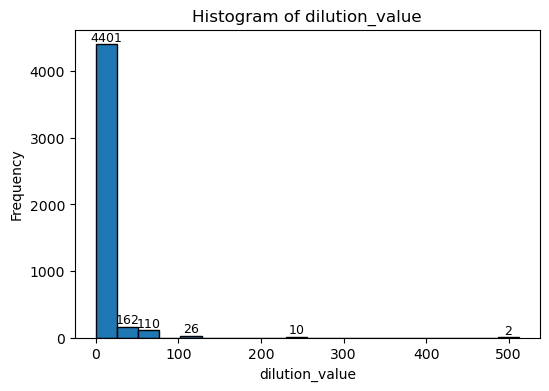

In [21]:
# Histogram
plt.figure(figsize=(6,4))
counts, bins, patches = plt.hist(df['dilution_value'].dropna(), bins=20, edgecolor='black')

plt.xlabel("dilution_value")
plt.ylabel("Frequency")
plt.title("Histogram of dilution_value")

# Annotate each bar with its frequency
for count, bin_left, patch in zip(counts, bins, patches):
    if count > 0:  # only label bars with non-zero height
        plt.text(bin_left + (patch.get_width()/2), count + 5,  # center on bar, slightly above
                 str(int(count)), ha='center', va='bottom', fontsize=9)

plt.show()

<p style="font-size:12px">

<b>Visualization of Skewed Numeric Data (dilution_value)</b><br>

The <code>dilution_value</code> column is highly skewed, with most values being small but a few extreme values much larger.  
Using a standard boxplot would stretch the scale due to these extremes, making the majority of the data difficult to interpret.

To address this, we apply a <b>symlog (symmetric log) scale</b> to the y-axis:  
<ul>
  <li>Compresses large values so that extreme points do not dominate the plot.</li>
  <li>Preserves small values, allowing us to see patterns in the bulk of the data.</li>
  <li>Provides a visually interpretable distribution without removing any data, respecting the clinical significance of extreme MIC dilution values.</li>
</ul>

<b>Interpretation of MIC dilution ranges:</b>
<ul>
  <li>0.06 → few cases → rare but valid</li>
  <li>0.12 → small but normal</li>
  <li>0.25–4 → common MIC range</li>
  <li>8–64 → moderately resistant</li>
  <li>128–512 → highly resistant strains (rare but expected)</li>
</ul>

This approach enables us to inspect unusual ranges and potential outliers before making any decisions about their handling.  

<b>Note:</b> For comparison, a normal boxplot is also plotted beside the symlog scale plot.

</p>

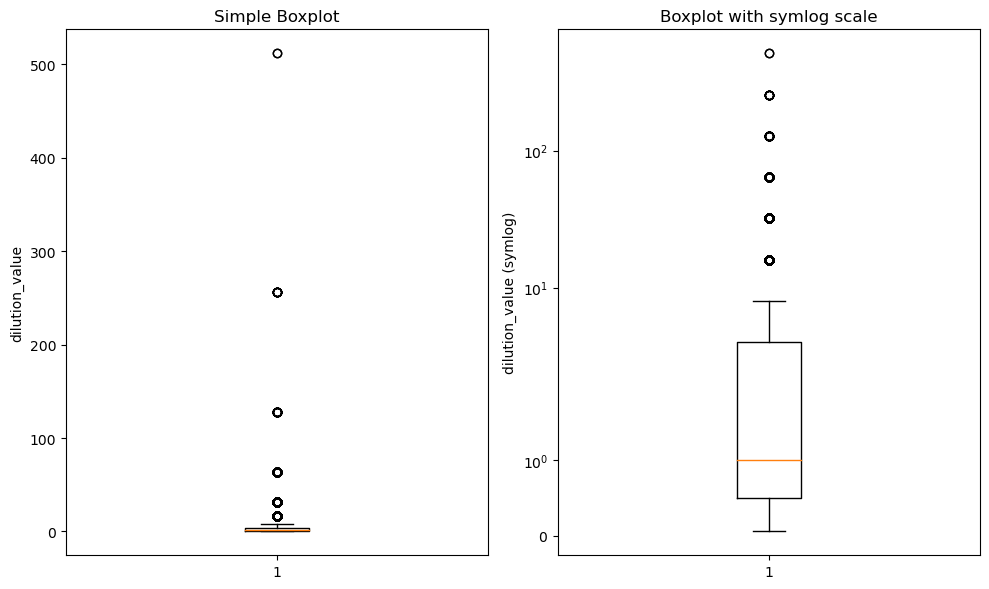

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(10,6))  # 1 row, 2 columns

# Simple boxplot
axes[0].boxplot(df['dilution_value'].dropna())
axes[0].set_title("Simple Boxplot")
axes[0].set_ylabel("dilution_value")

# Boxplot with symlog scale
axes[1].boxplot(df['dilution_value'].dropna())
axes[1].set_yscale('symlog')
axes[1].set_title("Boxplot with symlog scale")
axes[1].set_ylabel("dilution_value (symlog)")

plt.tight_layout()
plt.show()

**Should we remove high `dilution_value` values?**

**Short Answer:** No — we shouldkeep all values, even the large ones.  
**Reason:** They are biologically valid MIC values, not errors.

**Why? (Clinical / MIC Context)**  
- `dilution_value` = Minimum Inhibitory Concentration (MIC) of an antibiotic.  
- MICs are measured in standard doubling steps: 0.06 → 0.12 → 0.25 → 0.5 → 1 → 2 → 4 → 8 → 16 → 32 → 64 → 128 → 256 → 512 …  
- Large values (128, 256, 512) indicate resistant strains, not mistakes.  

**Key Points:**  
- Rare high MIC → resistant strain ✅  
- Removing them → lose clinically important data ❌  
- Always preserve biological variability.

<p style="font-size:12px">

<b>Data Consistency Cleaning (String Fields)</b><br>

For all string-based categorical columns, consistency checks were performed to ensure that values are clean, standardized, and free from formatting discrepancies.  
Each column was evaluated based on the type of information it contains:

- <b>spec_type_desc</b> and <b>test_name</b>:  
  Checked for leading/trailing spaces, casing inconsistencies, duplicate variants, and unexpected spellings.

- <b>org_name</b> (organism) and <b>ab_name</b> (antibiotic):  
  Verified for inconsistent capitalization (e.g., “E.COLI” vs “E.coli”), extra characters, and spacing issues.

- <b>dilution_comparison</b>:  
  Validated against the standard comparison operators (<code>&lt;=</code>, <code>&gt;=</code>, <code>=</code>).  
  Any invalid symbols or typos were flagged for review.

- <b>interpretation</b>:  
  Confirmed expected microbiology categories (e.g., “S”, “I”, “R”).  
  Checked for lowercase versions, trailing spaces, or unexpected labels.

- <b>technician_id</b>:  
  Ensured uniform formatting (string type), removed accidental spaces or punctuation, and validated against the expected pattern (e.g., <code>TECH_063</code>).  
  Any entries not matching the regex <code>^TECH_\d{3}$</code> were flagged.

- <b>qc_flag</b>:  
  Validated expected values such as “QC_OK”, “QC_WARN”, “QC_FAIL”, depending on dataset documentation.

To support these checks, frequency tables, uniqueness checks, whitespace/format pattern checks, and regex validations were generated for each string column.  
This ensures that downstream analysis is not affected by subtle inconsistencies in categorical values.

</p>

In [23]:
# List of string columns
string_cols = [
    "spec_type_desc", "test_name", "org_name", "ab_name",
    "dilution_comparison", "interpretation",
    "technician_id", "qc_flag"
]

In [24]:
# ---- 1. Basic whitespace + casing cleanup preview ----
for col in string_cols:
    if col in df.columns:
        print(f"\n---- Column: {col} ----")
        print("Sample unique values BEFORE cleaning:")
        print(df[col].dropna().unique()[:10])  # show first 10


---- Column: spec_type_desc ----
Sample unique values BEFORE cleaning:
<StringArray>
[                             'MRSA SCREEN',
                                    'URINE',
                                   'SPUTUM',
                                    'STOOL',
                           'SEROLOGY/BLOOD',
                                     'SWAB',
                            'BLOOD CULTURE',
 'Rapid Respiratory Viral Screen & Culture',
  'FLUID RECEIVED IN BLOOD CULTURE BOTTLES',
                              'FLUID,OTHER']
Length: 10, dtype: string

---- Column: test_name ----
Sample unique values BEFORE cleaning:
<StringArray>
[                           'MRSA SCREEN',
            'Legionella Urinary Antigen ',
                             'GRAM STAIN',
                    'RESPIRATORY CULTURE',
                        'ACID FAST SMEAR',
                      'ACID FAST CULTURE',
 'CLOSTRIDIUM DIFFICILE TOXIN A & B TEST',
               'RAPID PLASMA REAGIN TEST',
  'R/O VANCOM

In [25]:
# ---- 2. Check for leading/trailing spaces ----
for col in string_cols:
    if col in df.columns:
        # Convert to string
        col_series = df[col].astype('string')
        
        # Find rows with leading/trailing spaces
        bad_spaces = df[col_series.str.contains(r"^\s+|\s+$", na=False)]
        
        # Count only non-NaN rows
        non_na_total = col_series.notna().sum()
        
        print(f"\n{col}: Rows with leading/trailing spaces = {len(bad_spaces)} / {non_na_total} (non-empty rows)")
        
        # Fix by stripping spaces
        df[col] = col_series.str.strip()


spec_type_desc: Rows with leading/trailing spaces = 0 / 15586 (non-empty rows)

test_name: Rows with leading/trailing spaces = 132 / 15586 (non-empty rows)

org_name: Rows with leading/trailing spaces = 1 / 5391 (non-empty rows)

ab_name: Rows with leading/trailing spaces = 0 / 4820 (non-empty rows)

dilution_comparison: Rows with leading/trailing spaces = 4711 / 4711 (non-empty rows)

interpretation: Rows with leading/trailing spaces = 0 / 4820 (non-empty rows)

technician_id: Rows with leading/trailing spaces = 0 / 15586 (non-empty rows)

qc_flag: Rows with leading/trailing spaces = 0 / 15586 (non-empty rows)


In [26]:
# ---- 3. Check for case inconsistencies ----
for col in ["spec_type_desc", "test_name", "org_name", "ab_name"]:
    if col in df.columns:
        col_series = df[col].astype('string')
        
        # Count only non-NaN rows
        non_na_total = col_series.notna().sum()
        # Check unique variants
        lower = col_series.dropna().str.islower().sum()
        upper = col_series.dropna().str.isupper().sum()
        print(f"\n{col}: unique lower-case variants = {lower}/{non_na_total}  | upper-case variants = {upper}/{non_na_total} (non-empty rows)")
        
        # Convert all to upper case
        df[col] = col_series.str.upper()


spec_type_desc: unique lower-case variants = 0/15586  | upper-case variants = 14439/15586 (non-empty rows)

test_name: unique lower-case variants = 0/15586  | upper-case variants = 10633/15586 (non-empty rows)

org_name: unique lower-case variants = 0/5391  | upper-case variants = 5391/5391 (non-empty rows)

ab_name: unique lower-case variants = 0/4820  | upper-case variants = 4820/4820 (non-empty rows)


In [27]:
# ---- 4. dilution_comparison: validate allowed symbols ----
valid_symbols = {"<=", "=>", "="}
invalid_comparison = df[
    (~df["dilution_comparison"].isin(valid_symbols)) & 
    df["dilution_comparison"].notna()
]
print(f"\nInvalid dilution_comparison entries: {len(invalid_comparison)}")
if len(invalid_comparison) > 0:
    display(invalid_comparison.head())


Invalid dilution_comparison entries: 0


In [28]:
# ---- 5. interpretation: check expected microbiology labels ----
expected_interpretations = {"S", "I", "R"}
unexpected_interp = df[
    (~df["interpretation"].isin(expected_interpretations)) & 
    df["interpretation"].notna()
]
print(f"\nUnexpected interpretation labels: {len(unexpected_interp)}")
if len(unexpected_interp) > 0:
    display(unexpected_interp.head())


Unexpected interpretation labels: 0


In [29]:
# ---- 6. qc_flag: check unique values ----
expected_qc_flag = {'QC_OK', 'QC_WARN', 'QC_FAIL'}
unexpected_qc_flag = df[
    (~df["qc_flag"].isin(expected_qc_flag)) & 
    df["qc_flag"].notna()
]
print(f"\nUnexpected quality check flag labels: {len(unexpected_qc_flag)}")
if len(unexpected_qc_flag) > 0:
    display(unexpected_qc_flag.head())


Unexpected quality check flag labels: 0


In [30]:
# ---- 7. technician_id: regex pattern validation ----
pattern = r"^TECH_\d+$"

invalid_technician_ids = df[
    ~df["technician_id"].astype(str).str.match(pattern) & 
    df["technician_id"].notna()
]

print(f"\nTechnician IDs not matching expected pattern 'TECH_###': {len(invalid_technician_ids)}")
if len(invalid_technician_ids) > 0:
    display(invalid_technician_ids.head())


Technician IDs not matching expected pattern 'TECH_###': 0


##### Creating a dataframe for our cleaned dataset.

In [32]:
df_cleaned = df.copy()

### Analysis

### Colummn Wise Analysis

#### subject_id (patient-level)

##### Why do we want this analysis: because it reveals if a few patients dominate the dataset.

Unique patients: 2616
subject_id
12492737    122
13135946    107
11204646     89
15016682     83
16571922     73
12612603     65
15094687     64
19058876     63
14383658     61
17347569     60
10274145     56
19235707     55
10297774     54
10684958     54
19615440     53
14861499     52
18914188     52
13086918     52
16148712     51
14023270     51
dtype: int64


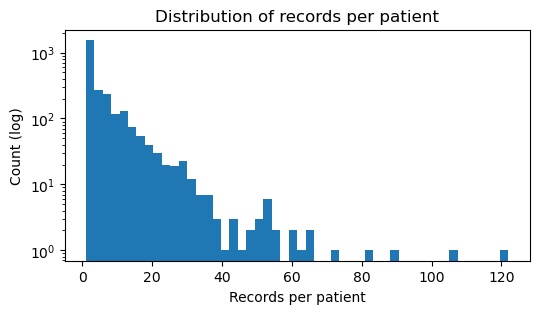

In [33]:
# basic counts
n_patients = df_cleaned['subject_id'].nunique()
records_per_patient = df_cleaned.groupby('subject_id').size().sort_values(ascending=False)

print("Unique patients:", n_patients)
print(records_per_patient.head(20))

# distribution plot (log-scaled histogram recommended)
import matplotlib.pyplot as plt
plt.figure(figsize=(6,3))
plt.hist(records_per_patient.values, bins=50, log=True)
plt.xlabel('Records per patient')
plt.ylabel('Count (log)')
plt.title('Distribution of records per patient')
plt.show()


#### hadm_id (admission-level)

##### Why do we want this analysis: because it is useful to decide whether to do analyses at admission-level or patient-level.

In [65]:
n_adm = df_cleaned['hadm_id'].nunique()
records_per_adm = df_cleaned.groupby('hadm_id').size().sort_values(ascending=False)
print("Unique admissions:", n_adm)
print(records_per_adm.head())

Unique admissions: 2454
hadm_id
27261448    124
22133572    107
29675270     86
25177313     84
21332395     66
dtype: int64


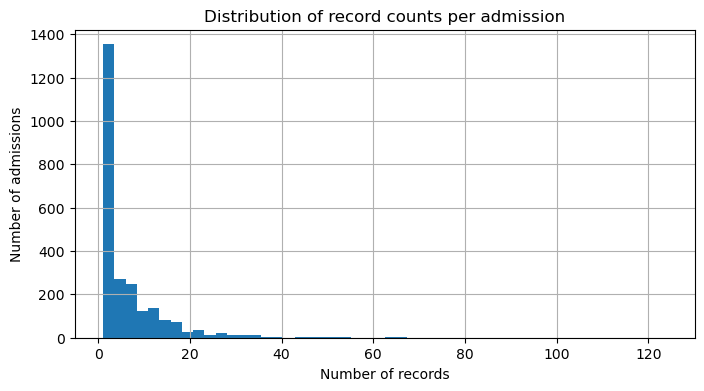

In [72]:
records_per_adm.hist(bins=50, figsize=(8,4)) 
plt.title("Distribution of record counts per admission") 
plt.xlabel("Number of records") 
plt.ylabel("Number of admissions")
plt.show()

In [66]:
# check patient/admission mapping
patient_adm_counts = df_cleaned.groupby('subject_id')['hadm_id'].nunique().value_counts().sort_index()
print(patient_adm_counts)

hadm_id
1    2488
2     116
3      12
Name: count, dtype: int64


[Text(0, 0, '2488'), Text(0, 0, '116'), Text(0, 0, '12')]

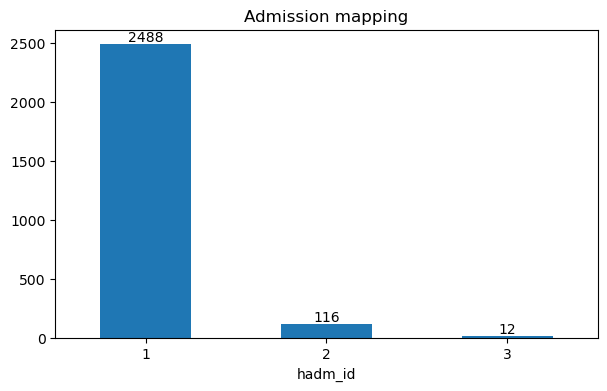

In [67]:
(ax := patient_adm_counts.plot(kind='bar', figsize=(7,4), title='Admission mapping',  rot=0)).bar_label(ax.containers[0])

#### charttime (timestamp)

##### Why do we want this analysis: because it detects seasonal outbreaks, lab operational patterns, or time-based QC issues.

2110-02-15 01:37:00 2209-12-20 17:42:00


Text(0.5, 1.0, 'Counts by weekday and hour')

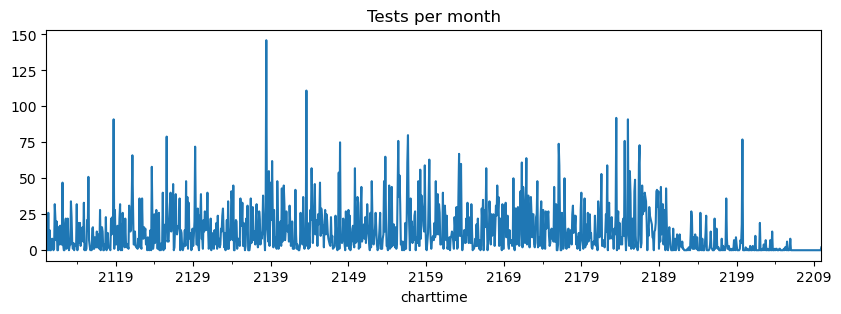

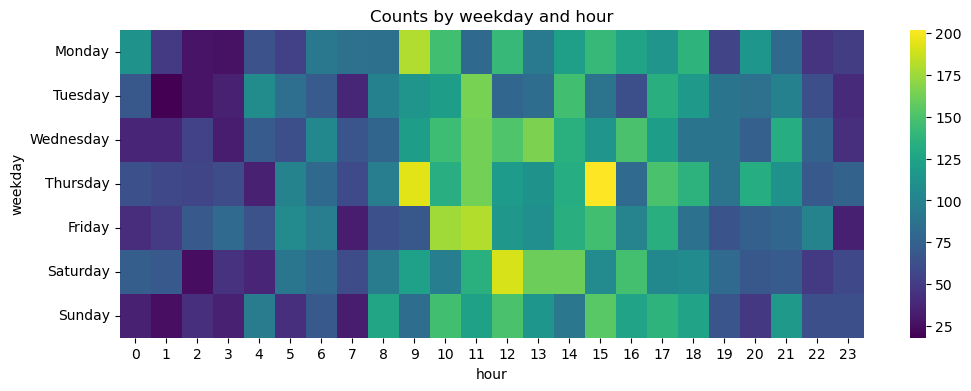

In [35]:
# timespan
print(df_cleaned['charttime'].min(), df_cleaned['charttime'].max())

# counts per month
df_cleaned.set_index('charttime', inplace=False).resample('M').size().plot(figsize=(10,3), title='Tests per month')

# weekday/hour heatmap
df_cleaned['hour'] = df_cleaned['charttime'].dt.hour
df_cleaned['weekday'] = df_cleaned['charttime'].dt.day_name()
pv = df_cleaned.pivot_table(index='weekday', columns='hour', values='test_name', aggfunc='count').fillna(0)
# reorder weekdays
order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
pv = pv.reindex(order)
import seaborn as sns
plt.figure(figsize=(12,4)); sns.heatmap(pv, cmap='viridis'); plt.title('Counts by weekday and hour')


#### spec_type_desc (specimen type)

##### Why do we want this analysis: because it stratifies analyses by specimen type (URINE vs BLOOD CULTURE differ a lot).

[Text(0, 0, '4951'),
 Text(0, 0, '3375'),
 Text(0, 0, '1847'),
 Text(0, 0, '1241'),
 Text(0, 0, '645'),
 Text(0, 0, '618'),
 Text(0, 0, '581'),
 Text(0, 0, '449'),
 Text(0, 0, '344'),
 Text(0, 0, '206'),
 Text(0, 0, '161'),
 Text(0, 0, '123'),
 Text(0, 0, '113'),
 Text(0, 0, '112'),
 Text(0, 0, '107'),
 Text(0, 0, '102'),
 Text(0, 0, '86'),
 Text(0, 0, '86'),
 Text(0, 0, '53'),
 Text(0, 0, '49')]

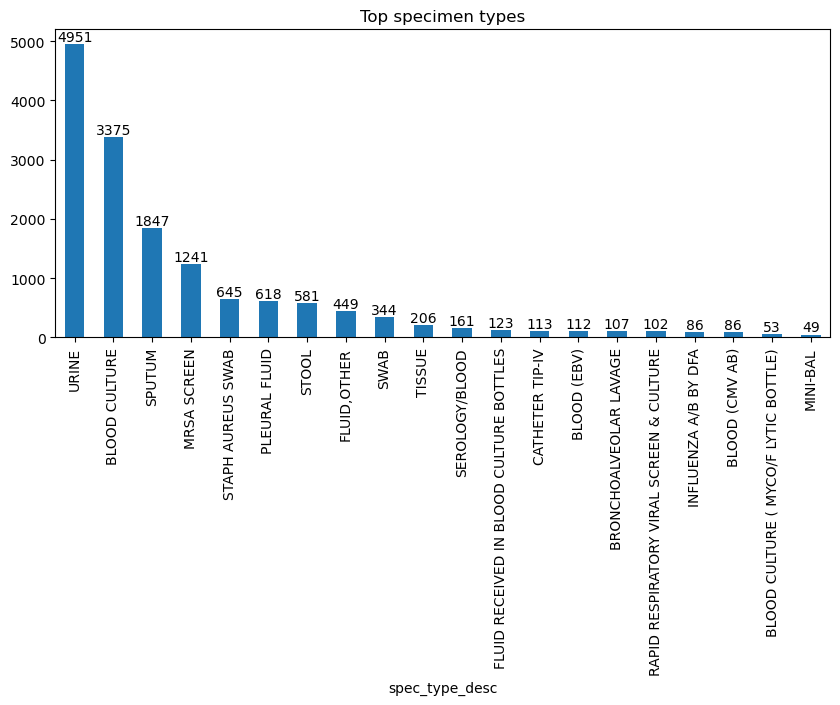

In [57]:
top_spec = df_cleaned['spec_type_desc'].value_counts().head(20)
(ax := top_spec.plot(kind='bar', figsize=(10,4), title='Top specimen types')).bar_label(ax.containers[0])

#### test_name

##### Why do we want this analysis: because different tests have different expected fields (cultures vs screens).

[Text(0, 0, '4795'),
 Text(0, 0, '3203'),
 Text(0, 0, '1241'),
 Text(0, 0, '1221'),
 Text(0, 0, '890'),
 Text(0, 0, '635'),
 Text(0, 0, '351'),
 Text(0, 0, '335'),
 Text(0, 0, '313'),
 Text(0, 0, '211'),
 Text(0, 0, '210'),
 Text(0, 0, '183'),
 Text(0, 0, '180'),
 Text(0, 0, '178'),
 Text(0, 0, '132'),
 Text(0, 0, '114'),
 Text(0, 0, '103'),
 Text(0, 0, '80'),
 Text(0, 0, '75'),
 Text(0, 0, '51'),
 Text(0, 0, '50'),
 Text(0, 0, '50'),
 Text(0, 0, '50'),
 Text(0, 0, '49'),
 Text(0, 0, '44'),
 Text(0, 0, '42'),
 Text(0, 0, '42'),
 Text(0, 0, '42'),
 Text(0, 0, '41'),
 Text(0, 0, '41')]

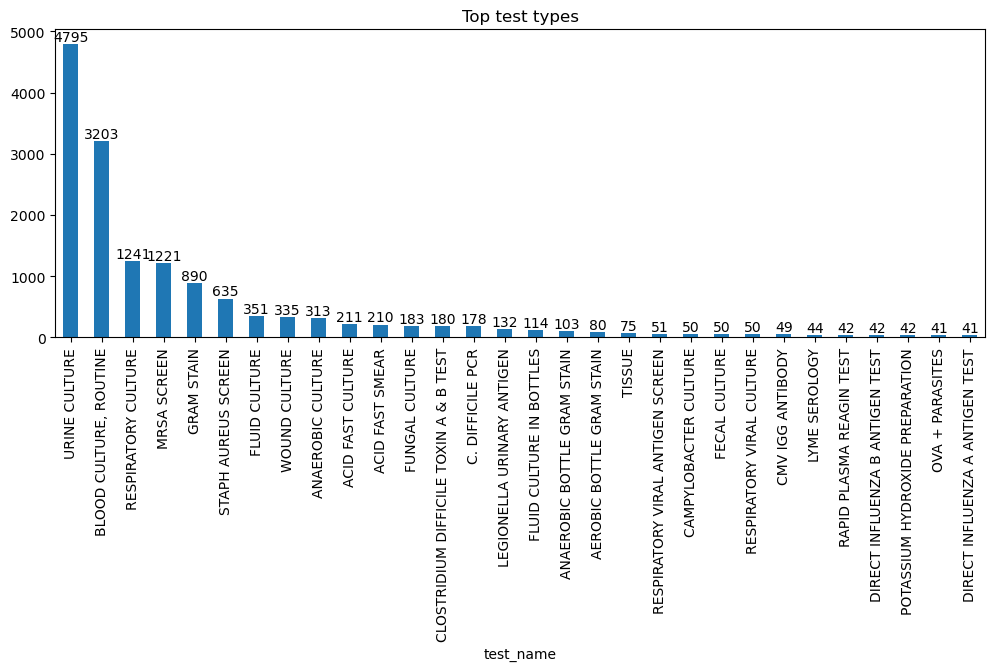

In [56]:
top_test = df_cleaned['test_name'].value_counts().head(30)
(ax := top_test.plot(kind='bar', figsize=(12,4), title='Top test types')).bar_label(ax.containers[0])

#### org_name (organism)

##### Why do we want this analysis: key for organism-specific resistance analysis.

In [ ]:
org_counts = df_cleaned['org_name'].value_counts(dropna=True)
org_counts.head(30)

org_name
ESCHERICHIA COLI                                   1508
STAPH AUREUS COAG +                                 966
KLEBSIELLA PNEUMONIAE                               763
ENTEROCOCCUS SP.                                    267
PSEUDOMONAS AERUGINOSA                              264
PROTEUS MIRABILIS                                   212
STAPHYLOCOCCUS, COAGULASE NEGATIVE                  183
YEAST                                               144
POSITIVE FOR METHICILLIN RESISTANT STAPH AUREUS     138
SERRATIA MARCESCENS                                  84
KLEBSIELLA OXYTOCA                                   73
CITROBACTER FREUNDII COMPLEX                         68
ENTEROBACTER CLOACAE                                 62
STAPHYLOCOCCUS EPIDERMIDIS                           60
GRAM NEGATIVE ROD(S)                                 47
ENTEROBACTER AEROGENES                               40
ENTEROBACTER CLOACAE COMPLEX                         40
ENTEROCOCCUS FAECALIS                  

[Text(0, 0, '1508'),
 Text(0, 0, '966'),
 Text(0, 0, '763'),
 Text(0, 0, '267'),
 Text(0, 0, '264'),
 Text(0, 0, '212'),
 Text(0, 0, '183'),
 Text(0, 0, '144'),
 Text(0, 0, '138'),
 Text(0, 0, '84'),
 Text(0, 0, '73'),
 Text(0, 0, '68'),
 Text(0, 0, '62'),
 Text(0, 0, '60'),
 Text(0, 0, '47'),
 Text(0, 0, '40'),
 Text(0, 0, '40'),
 Text(0, 0, '40'),
 Text(0, 0, '38'),
 Text(0, 0, '35'),
 Text(0, 0, '35'),
 Text(0, 0, '31'),
 Text(0, 0, '20'),
 Text(0, 0, '20'),
 Text(0, 0, '12'),
 Text(0, 0, '11'),
 Text(0, 0, '10'),
 Text(0, 0, '10'),
 Text(0, 0, '10'),
 Text(0, 0, '9')]

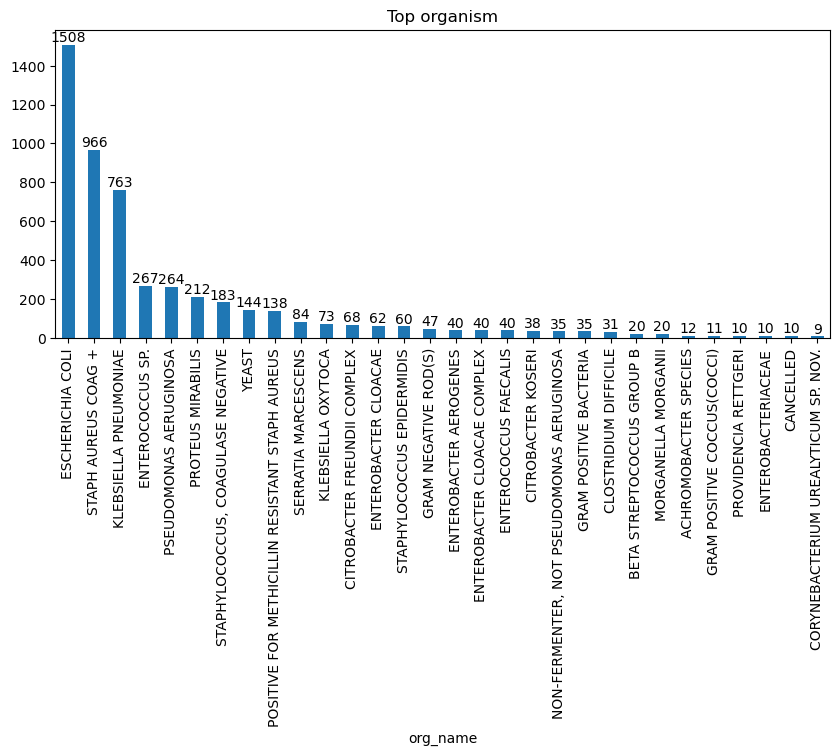

In [73]:
(ax := org_counts.head(30).plot(kind='bar', figsize=(10,4), title='Top organism')).bar_label(ax.containers[0])

In [42]:
prop_missing = df_cleaned['org_name'].isna().mean()
print("org_name missing %:", prop_missing)

org_name missing %: 0.6541126652123701


#### ab_name (antibiotic)

##### Why do we want this analysis: because it informs us which antibiotic-organism pairs are meaningful for resistance rate tables.

[Text(0, 0, '453'),
 Text(0, 0, '389'),
 Text(0, 0, '287'),
 Text(0, 0, '285'),
 Text(0, 0, '284'),
 Text(0, 0, '283'),
 Text(0, 0, '282'),
 Text(0, 0, '261'),
 Text(0, 0, '248'),
 Text(0, 0, '223'),
 Text(0, 0, '206'),
 Text(0, 0, '201'),
 Text(0, 0, '197'),
 Text(0, 0, '186'),
 Text(0, 0, '173'),
 Text(0, 0, '171'),
 Text(0, 0, '169'),
 Text(0, 0, '153'),
 Text(0, 0, '146'),
 Text(0, 0, '57'),
 Text(0, 0, '41'),
 Text(0, 0, '36'),
 Text(0, 0, '35'),
 Text(0, 0, '27'),
 Text(0, 0, '14'),
 Text(0, 0, '9'),
 Text(0, 0, '4')]

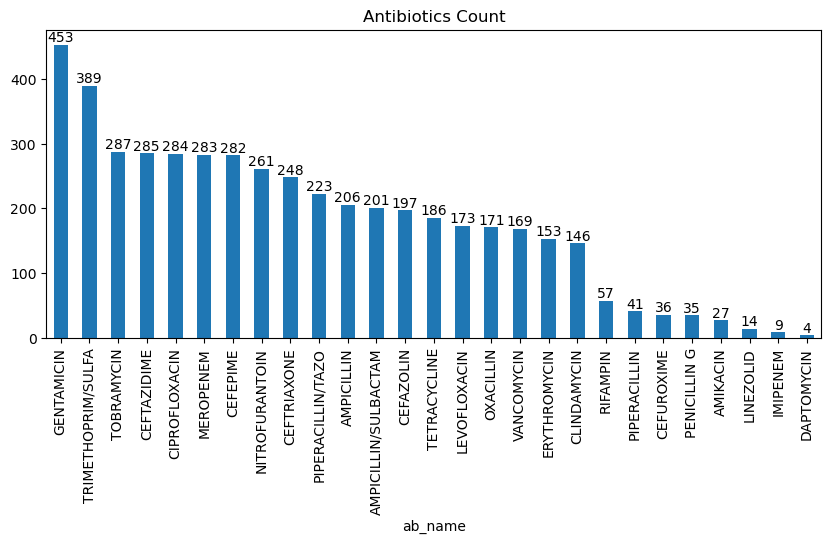

In [75]:
ab_counts = df_cleaned['ab_name'].value_counts(dropna=True)
(ax := ab_counts.plot(kind='bar', figsize=(10,4), title='Antibiotics Count')).bar_label(ax.containers[0])

#### dilution_value / dilution_comparison (MIC)

##### Why do we want this analysis: because it informs us which antibiotic-organism pairs are meaningful for resistance rate tables.

In [94]:
df['dilution_value'].value_counts().sort_values(ascending=False)

dilution_value
1.00      1544
0.25       708
4.00       636
0.50       442
16.00      418
2.00       308
8.00       292
32.00      162
64.00      110
0.12        49
128.00      26
256.00      10
0.06         3
512.00       2
3.00         1
Name: count, dtype: int64

[Text(0, 0, '3'),
 Text(0, 0, '49'),
 Text(0, 0, '708'),
 Text(0, 0, '442'),
 Text(0, 0, '1544'),
 Text(0, 0, '308'),
 Text(0, 0, '1'),
 Text(0, 0, '636'),
 Text(0, 0, '292'),
 Text(0, 0, '418'),
 Text(0, 0, '162'),
 Text(0, 0, '110'),
 Text(0, 0, '26'),
 Text(0, 0, '10'),
 Text(0, 0, '2')]

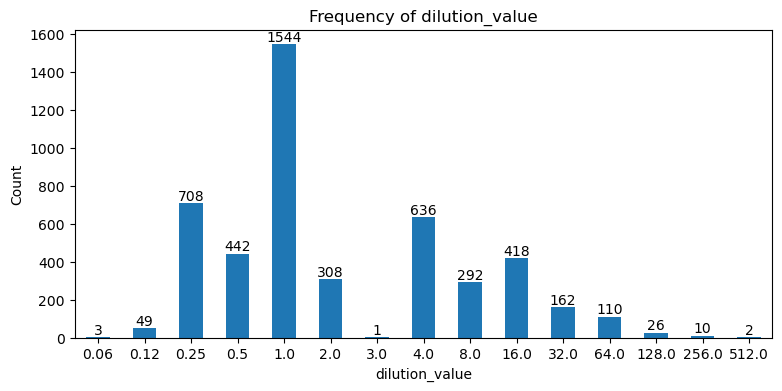

In [100]:
(ax := df['dilution_value'].value_counts().
                            sort_index(ascending=True).
                            plot(
                                kind='bar', 
                                figsize=(9,4), 
                                rot = 0,
                                xlabel = "dilution_value", 
                                ylabel = "Count", 
                                title = "Frequency of dilution_value"
                                )).bar_label(ax.containers[0])

#### interpretation (S/I/R)

##### Why do we want this analysis: because it informs us about central outcome variable for susceptibility analysis.

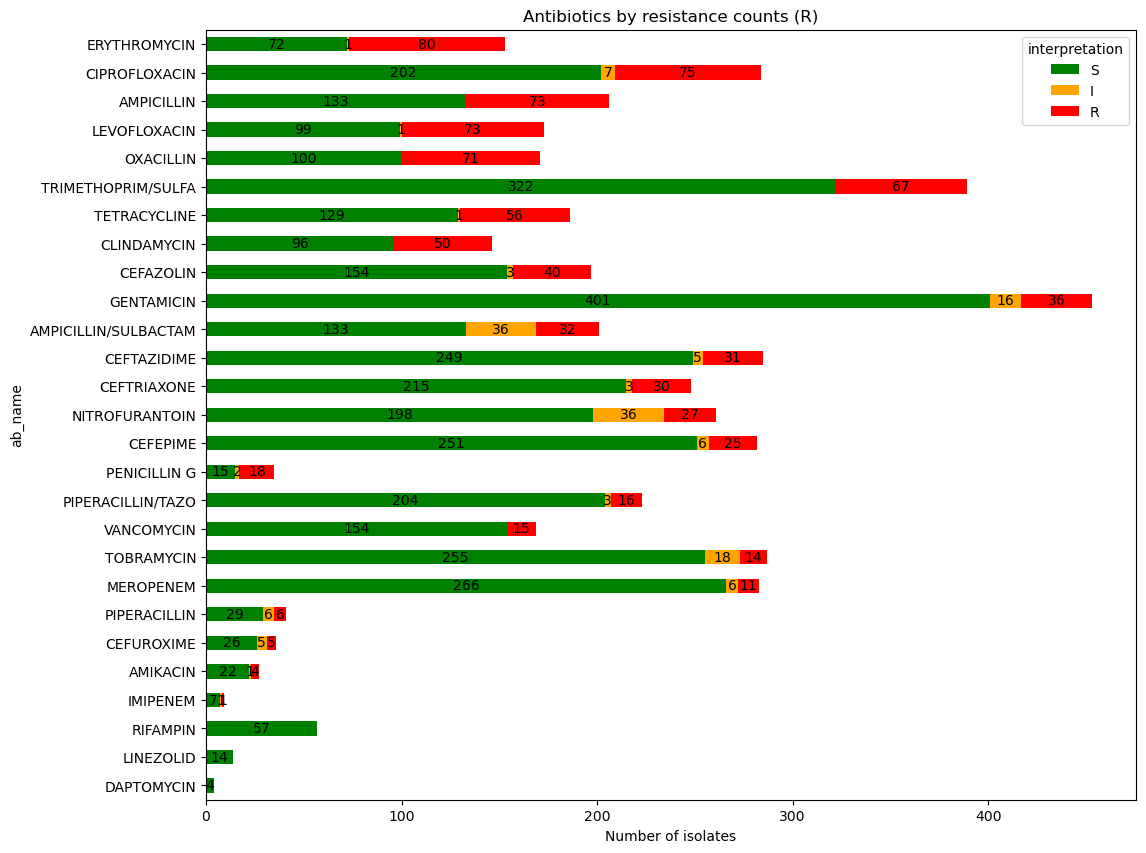

In [116]:
ax = counts[['S','I','R']].sort_values(by='R', ascending=False).plot(
    kind='barh',
    stacked=True,
    figsize=(12,10),
    color=['green', 'orange', 'red']
)

# Add labels only for non-zero segments
for container in ax.containers:
    for bar in container:
        width = bar.get_width()  # horizontal bar
        if width > 0:
            ax.text(
                bar.get_x() + width/2,  # x position: center of segment
                bar.get_y() + bar.get_height()/2,  # y position: vertical center
                f'{int(width)}',  # label text
                ha='center',
                va='center',
            )

plt.xlabel("Number of isolates")
plt.title("Antibiotics by resistance counts (R)")
plt.gca().invert_yaxis()  # largest R on top
plt.show()

#### How to interpret the antibiotic resistance chart

- **S (Susceptible)**: High S means the drug is likely effective. <span style="font-size:0.7em">Proportion of isolates that are effectively inhibited by the antibiotic.</span>
- **I (Intermediate)**: The antibiotic may work at higher doses or in certain body sites. <span style="font-size:0.7em">Proportion of isolates with reduced susceptibility.</span>
- **R (Resistant)**: High R indicates the drug is unlikely to be effective. <span style="font-size:0.7em">Proportion of isolates not inhibited by the antibiotic.</span>

**Reading the chart:**  
- Each horizontal bar shows the distribution of S, I, and R for a specific antibiotic.  
- Bars sorted by **R** highlight antibiotics with the highest resistance.  
- Longer green segments → more effective; longer red segments → higher resistance risk.

#### technician_id

##### Why do we want this analysis: because it detects lab/analyst-level systematic differences.

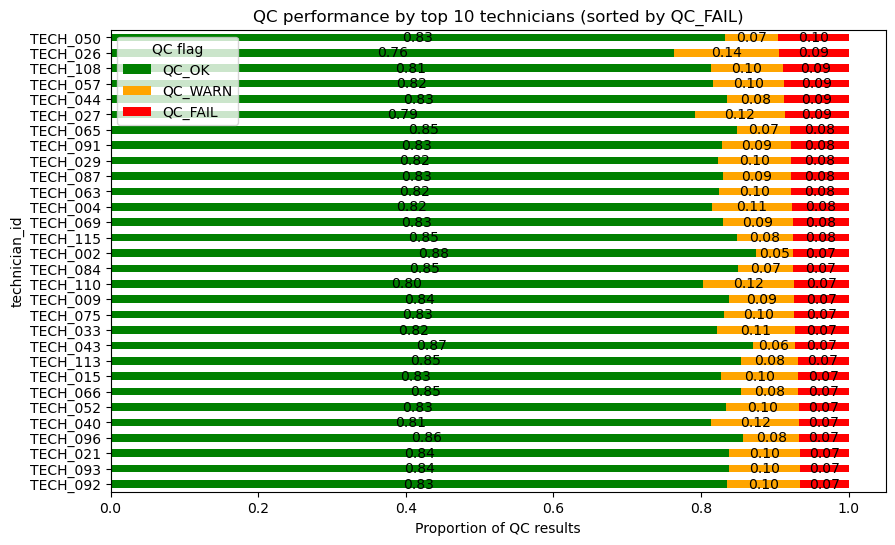

In [126]:
tech_counts = df_cleaned['technician_id'].value_counts()
# QC rate by tech
qc_by_tech = df_cleaned.groupby('technician_id')['qc_flag'].value_counts(normalize=True).unstack().fillna(0)
# qc_by_tech.sort_values('QC_FAIL', ascending=False)

top_techs = qc_by_tech.sort_values('QC_FAIL', ascending=False).head(30)
ax = top_techs[['QC_OK','QC_WARN','QC_FAIL']].plot(
    kind='barh',
    stacked=True,
    figsize=(10,6),
    color=['green','orange','red']
)

plt.xlabel("Proportion of QC results")
plt.title("QC performance by top 10 technicians (sorted by QC_FAIL)")
plt.legend(title="QC flag")
plt.gca().invert_yaxis()  # highest QC_FAIL on top

# Add labels inside each segment
for container in ax.containers:
    for bar in container:
        width = bar.get_width()
        if width > 0:
            ax.text(
                bar.get_x() + width/2,
                bar.get_y() + bar.get_height()/2,
                f'{width:.2f}',
                ha='center',
                va='center'
            )

plt.show()


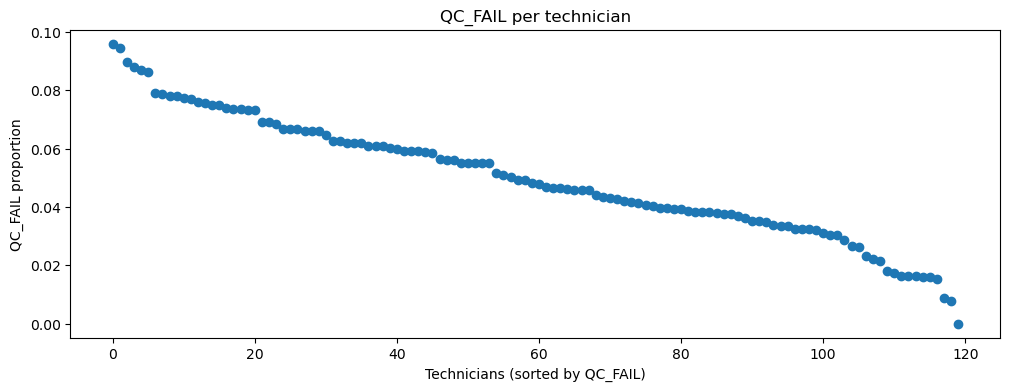

In [124]:
import matplotlib.pyplot as plt

# Sort by QC_FAIL
qc_fail_sorted = qc_by_tech['QC_FAIL'].sort_values(ascending=False)

# Create scatter plot
plt.figure(figsize=(12,4))
plt.scatter(range(len(qc_fail_sorted)), qc_fail_sorted.values)
plt.xlabel("Technicians (sorted by QC_FAIL)")
plt.ylabel("QC_FAIL proportion")
plt.title("QC_FAIL per technician")
plt.show()


#### interpretation (S/I/R)

##### Why do we want this analysis: because it informs us about central outcome variable for susceptibility analysis.

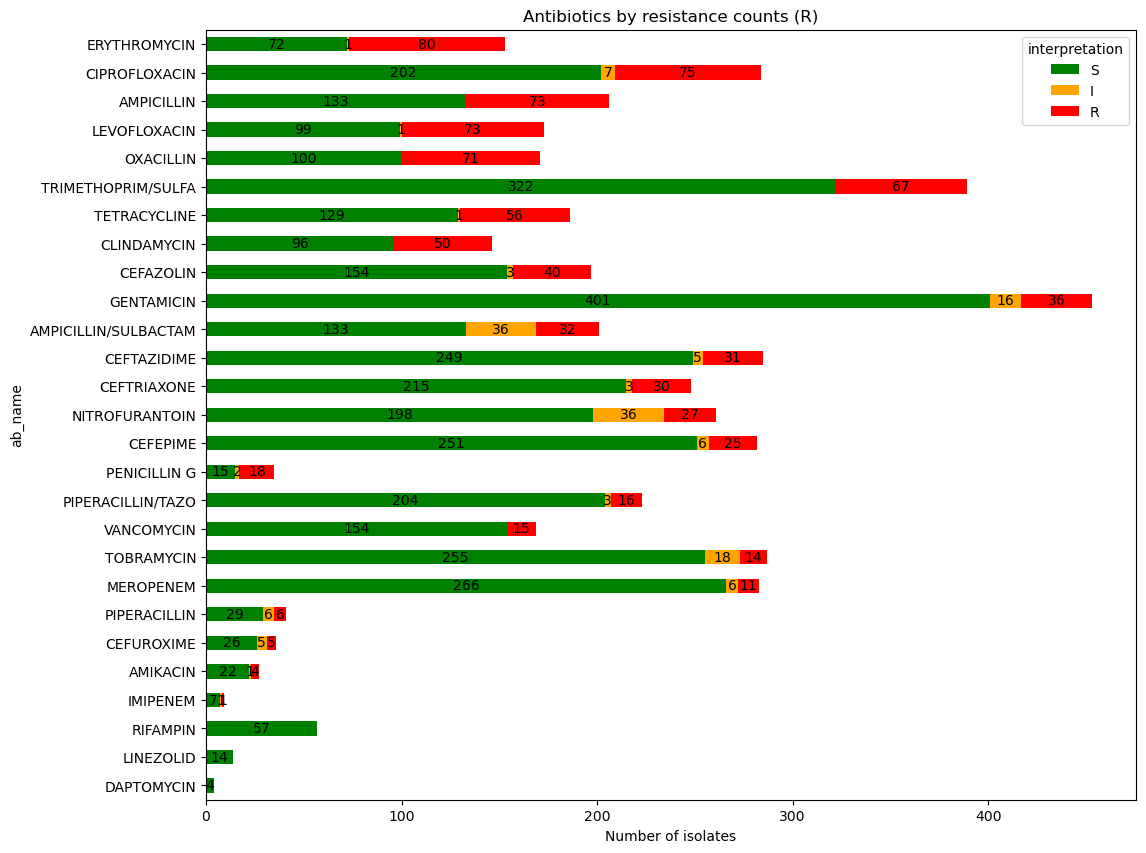

In [ ]:
ax = counts[['S','I','R']].sort_values(by='R', ascending=False).plot(
    kind='barh',
    stacked=True,
    figsize=(12,10),
    color=['green', 'orange', 'red']
)

# Add labels only for non-zero segments
for container in ax.containers:
    for bar in container:
        width = bar.get_width()  # horizontal bar
        if width > 0:
            ax.text(
                bar.get_x() + width/2,  # x position: center of segment
                bar.get_y() + bar.get_height()/2,  # y position: vertical center
                f'{int(width)}',  # label text
                ha='center',
                va='center',
            )

plt.xlabel("Number of isolates")
plt.title("Antibiotics by resistance counts (R)")
plt.gca().invert_yaxis()  # largest R on top
plt.show()

#### interpretation (S/I/R)

##### Why do we want this analysis: because it informs us about central outcome variable for susceptibility analysis.

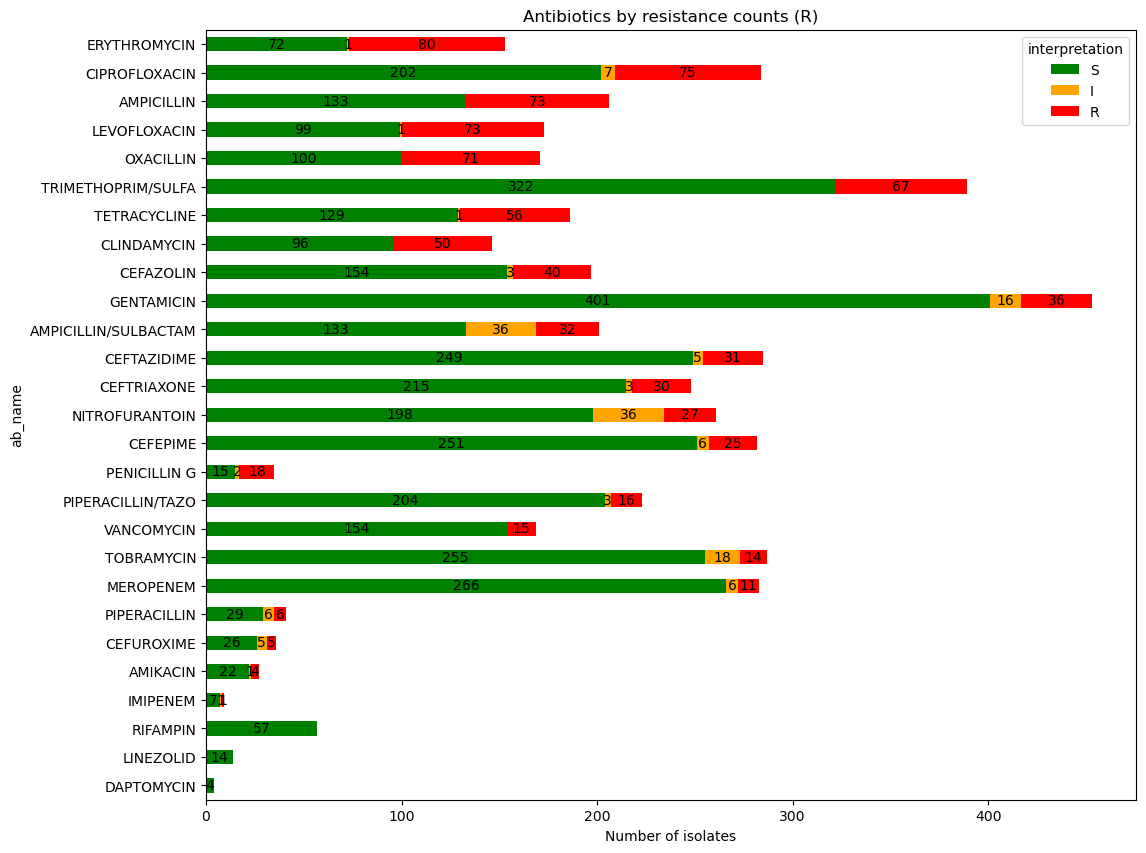

In [ ]:
ax = counts[['S','I','R']].sort_values(by='R', ascending=False).plot(
    kind='barh',
    stacked=True,
    figsize=(12,10),
    color=['green', 'orange', 'red']
)

# Add labels only for non-zero segments
for container in ax.containers:
    for bar in container:
        width = bar.get_width()  # horizontal bar
        if width > 0:
            ax.text(
                bar.get_x() + width/2,  # x position: center of segment
                bar.get_y() + bar.get_height()/2,  # y position: vertical center
                f'{int(width)}',  # label text
                ha='center',
                va='center',
            )

plt.xlabel("Number of isolates")
plt.title("Antibiotics by resistance counts (R)")
plt.gca().invert_yaxis()  # largest R on top
plt.show()

#### interpretation (S/I/R)

##### Why do we want this analysis: because it informs us about central outcome variable for susceptibility analysis.

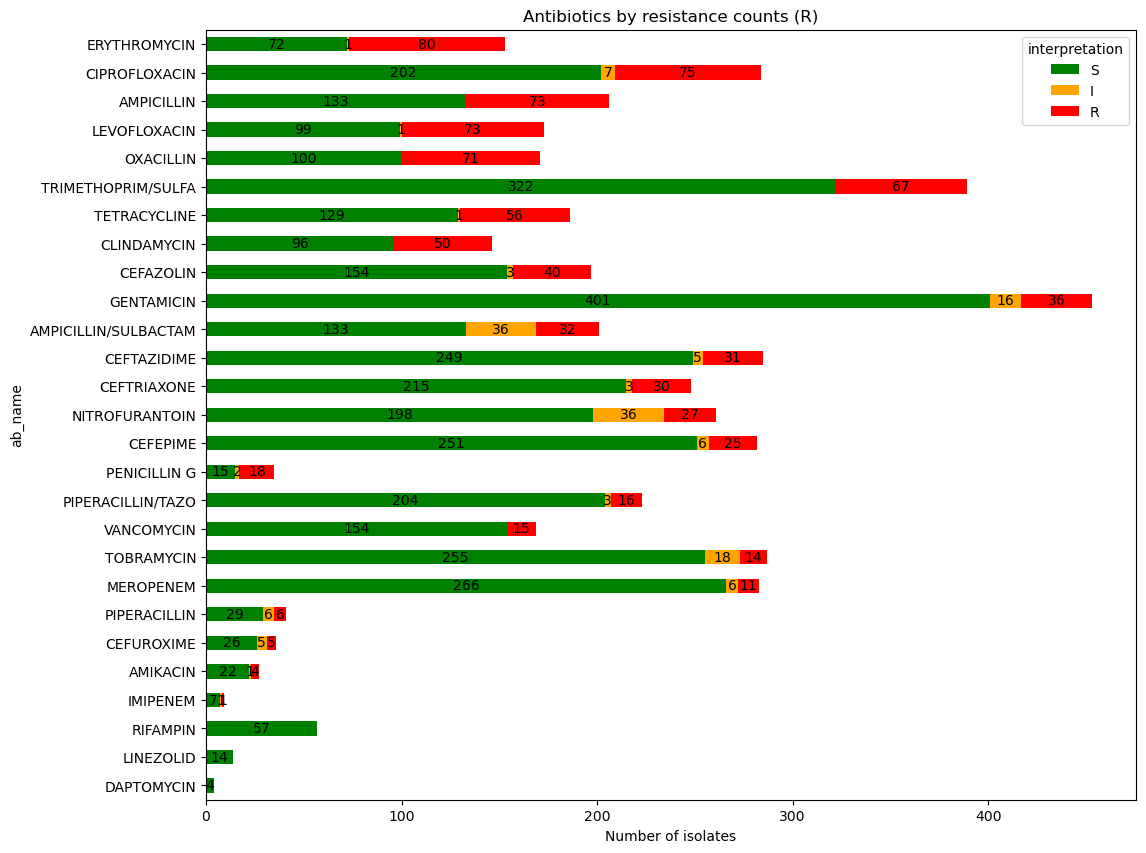

In [ ]:
ax = counts[['S','I','R']].sort_values(by='R', ascending=False).plot(
    kind='barh',
    stacked=True,
    figsize=(12,10),
    color=['green', 'orange', 'red']
)

# Add labels only for non-zero segments
for container in ax.containers:
    for bar in container:
        width = bar.get_width()  # horizontal bar
        if width > 0:
            ax.text(
                bar.get_x() + width/2,  # x position: center of segment
                bar.get_y() + bar.get_height()/2,  # y position: vertical center
                f'{int(width)}',  # label text
                ha='center',
                va='center',
            )

plt.xlabel("Number of isolates")
plt.title("Antibiotics by resistance counts (R)")
plt.gca().invert_yaxis()  # largest R on top
plt.show()